# 10강: 신경망 기초 모델 구현

## 🎯 학습 목표
- PyTorch 기본 사용법과 텐서 연산 마스터
- 퍼셉트론과 다층 신경망 직접 구현
- 순전파와 역전파 과정 완전 이해
- 활성화 함수와 최적화 알고리즘 실습

---

## 📚 강의 개요 (60분)
1. PyTorch 기본 사용법 (15분)
2. 퍼셉트론 구현 (15분)
3. 다층 신경망과 순전파/역전파 (20분)
4. 활성화 함수와 최적화 (10분)

> **이전 강의 복습**: 9강에서 배운 인공신경망 개념과 퍼셉트론 이론을 실제 코드로 구현해봅시다!


## 1. PyTorch 기본 사용법

### 1.1 PyTorch 설치 확인 및 환경 설정

**🔧 먼저 PyTorch가 제대로 설치되었는지 확인해보겠습니다.**

**필요한 라이브러리들:**
- **torch**: PyTorch 핵심 라이브러리
- **torch.nn**: 신경망 레이어와 모듈
- **torch.optim**: 최적화 알고리즘
- **numpy**: 수치 계산
- **matplotlib**: 시각화

### 1.2 텐서(Tensor) 기본 연산

**📊 텐서는 PyTorch의 핵심 데이터 구조입니다.**

**텐서의 특징:**
- NumPy 배열과 유사하지만 GPU 연산 지원
- 자동 미분(AutoGrad) 기능 내장
- 신경망과 완벽 연동

**주요 텐서 연산:**
1. **생성**: zeros, ones, randn, tensor
2. **변형**: reshape, view, transpose
3. **연산**: 덧셈, 곱셈, 행렬곱
4. **이동**: CPU ↔ GPU 간 데이터 이동

### 1.3 자동 미분(AutoGrad) 이해

**⚡ 자동 미분은 딥러닝의 핵심 기능입니다.**

**AutoGrad의 작동 원리:**
1. `requires_grad=True`로 설정된 텐서의 연산 추적
2. 계산 그래프(Computational Graph) 자동 생성
3. `backward()` 호출 시 연쇄 법칙으로 기울기 계산
4. `.grad` 속성에 기울기 저장

**왜 중요한가요?**
- 복잡한 함수의 미분을 자동으로 계산
- 역전파 알고리즘의 핵심 구현
- 수동 미분 계산의 오류 방지


In [1]:
!nvidia-smi

Sat Jun 28 02:23:07 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.79       Driver Version: 528.79       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   64C    P8     2W /  50W |    142MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:32:27_Pacific_Daylight_Time_2019
Cuda compilation tools, release 10.2, V10.2.89


In [4]:
!pip install torch==1.10.1+cu102 torchvision==0.11.2+cu102 torchaudio==0.10.1 -f https://download.pytorch.org/whl/cu102/torch_stable.html

^C


In [ ]:
!pip uninstall numpy

In [1]:
# PyTorch 설치 확인 및 기본 텐서 연산
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
# print(f)
# 확인 이후
plt.rc('font', family='Malgun Gothic')

In [3]:
print("=== PyTorch 환경 확인 ===")
print(f"PyTorch 버전: {torch.__version__}")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA 버전: {torch.version.cuda}")
    print(f"GPU 개수: {torch.cuda.device_count()}")
    print(f"현재 GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CPU 환경에서 실행됩니다.")

print(f"\n=== 텐서 기본 연산 ===")

=== PyTorch 환경 확인 ===
PyTorch 버전: 1.10.1+cu102
CUDA 사용 가능: True
CUDA 버전: 10.2
GPU 개수: 1
현재 GPU: NVIDIA GeForce GTX 1650

=== 텐서 기본 연산 ===


In [4]:
# 1. 텐서 생성
print("1. 다양한 텐서 생성 방법:")
tensor_zeros = torch.zeros(2, 3)
tensor_ones = torch.ones(2, 3)
tensor_random = torch.randn(2, 3)  # 표준정규분포
tensor_range = torch.arange(0, 10, 2)  # 0부터 10까지 2씩 증가

print(f"영행렬:\n{tensor_zeros}")
print(f"일행렬:\n{tensor_ones}")
print(f"랜덤 행렬:\n{tensor_random}")
print(f"범위 텐서: {tensor_range}")


1. 다양한 텐서 생성 방법:
영행렬:
tensor([[0., 0., 0.],
        [0., 0., 0.]])
일행렬:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
랜덤 행렬:
tensor([[-0.1789, -1.0030, -0.2084],
        [ 0.5262, -0.2145, -0.0587]])
범위 텐서: tensor([0, 2, 4, 6, 8])


In [5]:

# 2. 텐서 정보 확인
print(f"\n2. 텐서 정보:")
x = torch.randn(3, 4, 5)
print(f"Shape: {x.shape}")
print(f"Size: {x.size()}")
print(f"차원: {x.dim()}")
print(f"데이터 타입: {x.dtype}")
print(f"디바이스: {x.device}")


2. 텐서 정보:
Shape: torch.Size([3, 4, 5])
Size: torch.Size([3, 4, 5])
차원: 3
데이터 타입: torch.float32
디바이스: cpu


In [6]:
# 3. 기본 연산
print(f"\n3. 기본 텐서 연산:")
a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
b = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

print(f"a:\n{a}")
print(f"b:\n{b}")
print(f"덧셈 a + b:\n{a + b}")
print(f"곱셈 a * b (원소별):\n{a * b}")
print(f"행렬곱 a @ b:\n{a @ b}")


3. 기본 텐서 연산:
a:
tensor([[1., 2.],
        [3., 4.]])
b:
tensor([[5., 6.],
        [7., 8.]])
덧셈 a + b:
tensor([[ 6.,  8.],
        [10., 12.]])
곱셈 a * b (원소별):
tensor([[ 5., 12.],
        [21., 32.]])
행렬곱 a @ b:
tensor([[19., 22.],
        [43., 50.]])


In [7]:
# 4. 자동 미분(AutoGrad) 기본
print(f"\n4. 자동 미분 기본:")
x = torch.tensor(2.0, requires_grad=True)
y = x**2 + 3*x + 1
print(f"x = {x}")
print(f"y = x² + 3x + 1 = {y}")

# 역전파 수행
y.backward()
print(f"dy/dx = 2x + 3 = {x.grad}")



4. 자동 미분 기본:
x = 2.0
y = x² + 3x + 1 = 11.0
dy/dx = 2x + 3 = 7.0


In [8]:

# 5. 더 복잡한 자동 미분 예제
print(f"\n5. 복잡한 자동 미분:")
x = torch.tensor([1.0, 2.0], requires_grad=True)
y = torch.tensor([3.0, 4.0], requires_grad=True)

# z = x^2 + y^2의 합
z = torch.sum(x**2 + y**2)
print(f"x = {x}")
print(f"y = {y}")
print(f"z = sum(x² + y²) = {z}")

z.backward()
print(f"dz/dx = 2x = {x.grad}")
print(f"dz/dy = 2y = {y.grad}")

print("\nPyTorch 기본 사용법 실습 완료! ✅")



5. 복잡한 자동 미분:
x = tensor([1., 2.], requires_grad=True)
y = tensor([3., 4.], requires_grad=True)
z = sum(x² + y²) = 30.0
dz/dx = 2x = tensor([2., 4.])
dz/dy = 2y = tensor([6., 8.])

PyTorch 기본 사용법 실습 완료! ✅


## 2. 퍼셉트론 구현

### 2.1 AND 게이트로 퍼셉트론 이해하기

**🎯 목표: 9강에서 배운 퍼셉트론을 직접 구현해봅시다.**

**📊 AND 게이트 복습:**
```
입력1  입력2  →  출력
  0     0    →   0
  0     1    →   0
  1     0    →   0
  1     1    →   1
```

**🔧 퍼셉트론 구조:**
```
x₁ ──w₁──┐
          ├──→ net = w₁x₁ + w₂x₂ + b ──→ σ(net) ──→ 출력
x₂ ──w₂──┘
    +
   bias b
```

### 2.2 함수로 퍼셉트론 구현

**💻 클래스 대신 함수로 퍼셉트론을 만들어봅시다.**

**핵심 구성 요소:**
1. **가중치와 편향**: 직접 텐서로 정의
2. **순전파 함수**: 입력을 받아 출력을 계산
3. **시그모이드 함수**: 0~1 사이 값으로 변환
4. **수동 역전파**: 가중치 업데이트 과정 직접 구현

**🔍 왜 함수로 시작할까요?**
- 클래스보다 이해하기 쉬움
- 계산 과정이 명확히 보임
- 역전파 과정을 직접 구현해볼 수 있음

### 2.3 학습 과정 구현

**📈 퍼셉트론 학습 단계:**
1. **데이터 준비**: AND 게이트 입출력 데이터
2. **모델 정의**: 퍼셉트론 클래스 인스턴스 생성
3. **손실 함수**: Binary Cross Entropy (BCE)
4. **옵티마이저**: Stochastic Gradient Descent (SGD)
5. **학습 루프**: 순전파 → 손실 계산 → 역전파 → 가중치 업데이트

**🔄 학습 루프의 핵심:**
```python
for epoch in range(epochs):
    # 순전파
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 역전파
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 업데이트
```


=== 함수로 퍼셉트론 구현하기 ===
AND 게이트 데이터:
입력: [0.0, 0.0], 출력: 0.0
입력: [0.0, 1.0], 출력: 0.0
입력: [1.0, 0.0], 출력: 0.0
입력: [1.0, 1.0], 출력: 1.0

초기 가중치와 편향:
weights:
tensor([[0.1683],
        [0.0644]])
bias: tensor([0.1172])

학습 전 예측:
입력: [0.0, 0.0], 예측: 0.529, 실제: 0.0
입력: [0.0, 1.0], 예측: 0.545, 실제: 0.0
입력: [1.0, 0.0], 예측: 0.571, 실제: 0.0
입력: [1.0, 1.0], 예측: 0.587, 실제: 1.0

=== 수동 역전파로 학습 시작 ===
Epoch 200/1000, Loss: 0.1433
  가중치: [3.048, 3.047]
  편향: -4.789
Epoch 400/1000, Loss: 0.0815
  가중치: [4.245, 4.244]
  편향: -6.559
Epoch 600/1000, Loss: 0.0565
  가중치: [5.010, 5.010]
  편향: -7.699
Epoch 800/1000, Loss: 0.0430
  가중치: [5.572, 5.572]
  편향: -8.538
Epoch 1000/1000, Loss: 0.0347
  가중치: [6.015, 6.015]
  편향: -9.200

최종 가중치와 편향:
weights:
tensor([[6.0153],
        [6.0153]])
bias: tensor([-9.2002])

학습 후 예측:
입력: [0.0, 0.0], 예측: 0.000 → 0, 실제: 0 ✅
입력: [0.0, 1.0], 예측: 0.040 → 0, 실제: 0 ✅
입력: [1.0, 0.0], 예측: 0.040 → 0, 실제: 0 ✅
입력: [1.0, 1.0], 예측: 0.944 → 1, 실제: 1 ✅


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\901835342.py:188: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\jungh\Anaconda3\envs\aibasic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


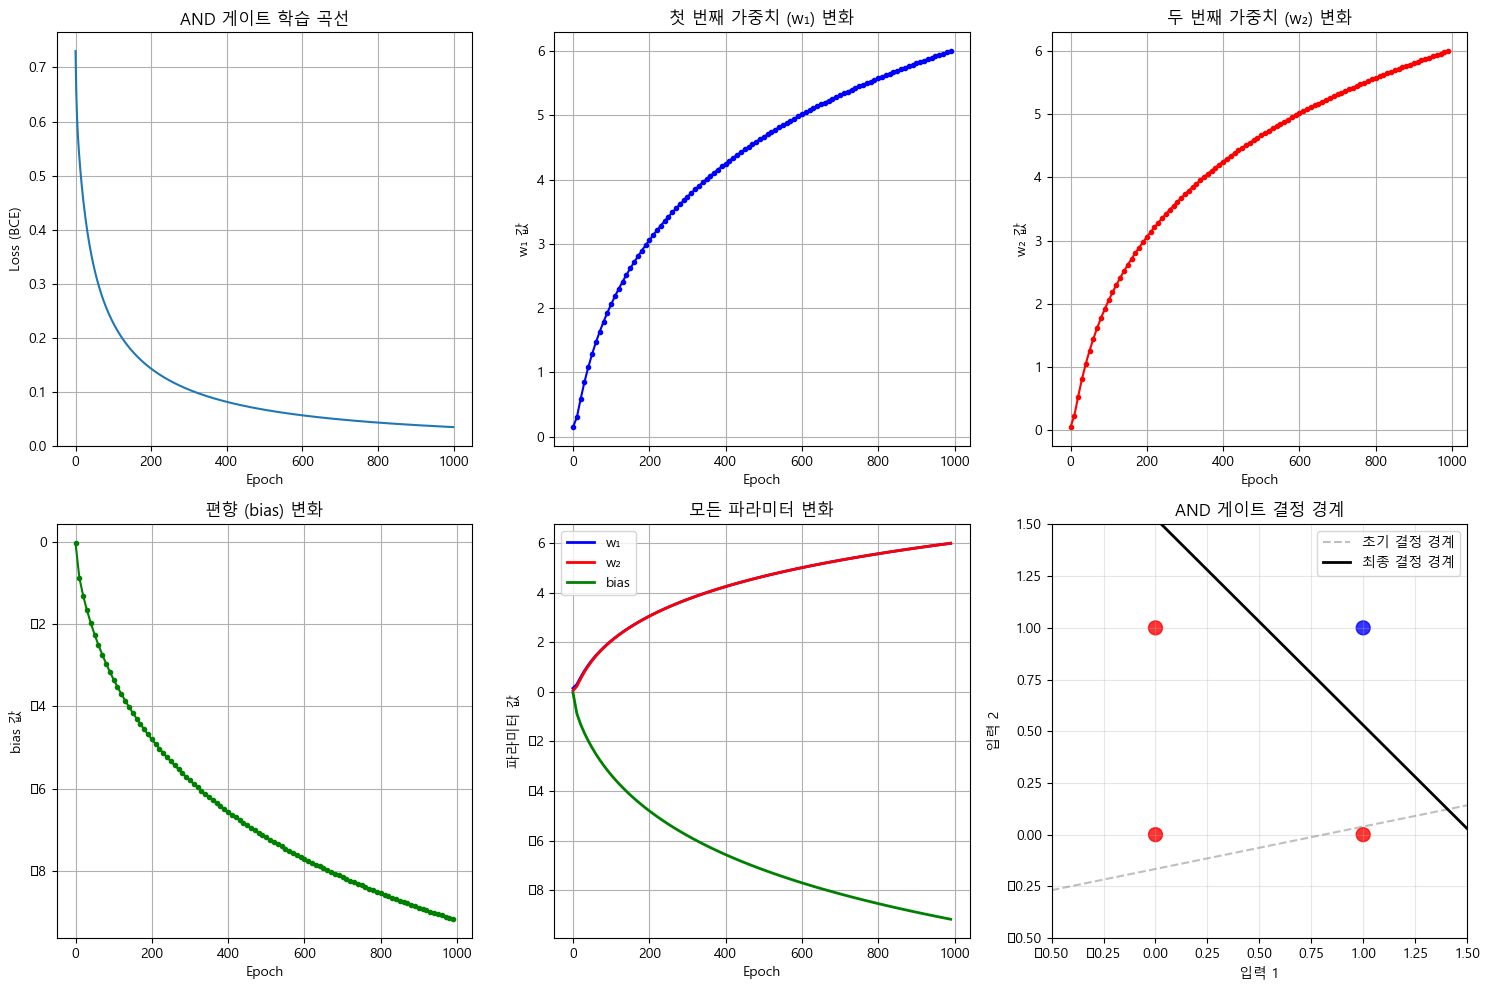


함수 기반 퍼셉트론 학습 완료! ✅

🔍 역전파 과정 요약:
1. 순전파: 입력 → 가중합 → 시그모이드 → 출력
2. 손실 계산: BCE 손실 함수로 오차 측정
3. 역전파: 연쇄 법칙으로 각 파라미터의 기울기 계산
4. 업데이트: 기울기 하강법으로 가중치와 편향 조정
5. 반복: 손실이 줄어들 때까지 2-4 과정 반복


In [9]:
# 함수로 퍼셉트론 구현하기
print("=== 함수로 퍼셉트론 구현하기 ===")

# 1. AND 게이트 데이터 준비
X_and = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_and = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

print("AND 게이트 데이터:")
for i in range(len(X_and)):
    print(f"입력: {X_and[i].tolist()}, 출력: {y_and[i].item()}")

# 2. 시그모이드 함수 직접 구현
def sigmoid(x):
    """시그모이드 함수: 0~1 사이 값으로 변환"""
    return 1 / (1 + torch.exp(-x))

def sigmoid_derivative(x):
    """시그모이드 함수의 미분: 역전파에 사용"""
    s = sigmoid(x)
    return s * (1 - s)

# 3. 퍼셉트론 순전파 함수
def perceptron_forward(x, weights, bias):
    """
    퍼셉트론 순전파
    x: 입력 (N, 2)
    weights: 가중치 (2, 1) 
    bias: 편향 (1,)
    """
    # 선형 변환: z = x @ weights + bias
    z = torch.mm(x, weights) + bias
    # 활성화 함수: output = sigmoid(z)
    output = sigmoid(z)
    return output, z  # 출력과 활성화 전 값 모두 반환 (역전파용)

# 4. 가중치와 편향 초기화
torch.manual_seed(42)  # 재현 가능한 결과를 위해
weights = torch.randn(2, 1, requires_grad=False) * 0.5  # 가중치 (2x1)
bias = torch.randn(1, requires_grad=False) * 0.5        # 편향 (1,)

print(f"\n초기 가중치와 편향:")
print(f"weights:\n{weights}")
print(f"bias: {bias}")

# 5. 학습 전 예측 확인
print(f"\n학습 전 예측:")
with torch.no_grad():
    pred_before, _ = perceptron_forward(X_and, weights, bias)
    for i in range(len(X_and)):
        print(f"입력: {X_and[i].tolist()}, 예측: {pred_before[i].item():.3f}, 실제: {y_and[i].item()}")

# 6. 수동 역전파로 학습
print(f"\n=== 수동 역전파로 학습 시작 ===")
learning_rate = 0.5
epochs = 1000
losses = []
weight_history = []  # 가중치 변화 추적
bias_history = []    # 편향 변화 추적

for epoch in range(epochs):
    # 순전파
    outputs, z = perceptron_forward(X_and, weights, bias)
    
    # 손실 계산 (Binary Cross Entropy)
    # BCE = -[y*log(p) + (1-y)*log(1-p)]
    epsilon = 1e-15  # 로그(0) 방지
    outputs_clipped = torch.clamp(outputs, epsilon, 1-epsilon)
    loss = -torch.mean(y_and * torch.log(outputs_clipped) + 
                      (1 - y_and) * torch.log(1 - outputs_clipped))
    losses.append(loss.item())
    
    # 역전파 계산 (연쇄 법칙 적용)
    # 1. 출력층 기울기: dL/dz = (predicted - actual)
    dL_dz = outputs - y_and  # (4, 1)
    
    # 2. 가중치 기울기: dL/dw = X^T @ dL_dz
    dL_dw = torch.mm(X_and.t(), dL_dz) / len(X_and)  # (2, 1)
    
    # 3. 편향 기울기: dL/db = mean(dL_dz)
    dL_db = torch.mean(dL_dz, dim=0)  # (1,)
    
    # 4. 가중치와 편향 업데이트
    weights = weights - learning_rate * dL_dw
    bias = bias - learning_rate * dL_db
    
    # 가중치 변화 기록 (나중에 시각화용)
    if epoch % 10 == 0:  # 10 에포크마다 기록
        weight_history.append(weights.clone())
        bias_history.append(bias.clone())
    
    # 진행 상황 출력
    if (epoch + 1) % 200 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
        print(f"  가중치: [{weights[0].item():.3f}, {weights[1].item():.3f}]")
        print(f"  편향: {bias.item():.3f}")

print(f"\n최종 가중치와 편향:")
print(f"weights:\n{weights}")
print(f"bias: {bias}")

# 7. 학습 후 예측 확인
print(f"\n학습 후 예측:")
with torch.no_grad():
    pred_after, _ = perceptron_forward(X_and, weights, bias)
    for i in range(len(X_and)):
        predicted = 1 if pred_after[i].item() > 0.5 else 0
        actual = int(y_and[i].item())
        correct = "✅" if predicted == actual else "❌"
        print(f"입력: {X_and[i].tolist()}, 예측: {pred_after[i].item():.3f} → {predicted}, 실제: {actual} {correct}")

# 8. 가중치 변화 과정 시각화
plt.figure(figsize=(15, 10))

# 8-1. 학습 곡선
plt.subplot(2, 3, 1)
plt.plot(losses)
plt.title('AND 게이트 학습 곡선')
plt.xlabel('Epoch')
plt.ylabel('Loss (BCE)')
plt.grid(True)

# 8-2. 가중치 변화 (첫 번째 가중치)
plt.subplot(2, 3, 2)
w1_history = [w[0].item() for w in weight_history]
epochs_recorded = list(range(0, len(w1_history)*10, 10))
plt.plot(epochs_recorded, w1_history, 'b-', marker='o', markersize=3)
plt.title('첫 번째 가중치 (w₁) 변화')
plt.xlabel('Epoch')
plt.ylabel('w₁ 값')
plt.grid(True)

# 8-3. 가중치 변화 (두 번째 가중치)
plt.subplot(2, 3, 3)
w2_history = [w[1].item() for w in weight_history]
plt.plot(epochs_recorded, w2_history, 'r-', marker='o', markersize=3)
plt.title('두 번째 가중치 (w₂) 변화')
plt.xlabel('Epoch')
plt.ylabel('w₂ 값')
plt.grid(True)

# 8-4. 편향 변화
plt.subplot(2, 3, 4)
b_history = [b.item() for b in bias_history]
plt.plot(epochs_recorded, b_history, 'g-', marker='o', markersize=3)
plt.title('편향 (bias) 변화')
plt.xlabel('Epoch')
plt.ylabel('bias 값')
plt.grid(True)

# 8-5. 가중치와 편향 모두 함께
plt.subplot(2, 3, 5)
plt.plot(epochs_recorded, w1_history, 'b-', label='w₁', linewidth=2)
plt.plot(epochs_recorded, w2_history, 'r-', label='w₂', linewidth=2)
plt.plot(epochs_recorded, b_history, 'g-', label='bias', linewidth=2)
plt.title('모든 파라미터 변화')
plt.xlabel('Epoch')
plt.ylabel('파라미터 값')
plt.legend()
plt.grid(True)

# 8-6. 결정 경계 시각화 (학습 전후 비교)
plt.subplot(2, 3, 6)

# 초기 가중치로 결정 경계 (점선)
initial_w = torch.randn(2, 1) * 0.5
initial_b = torch.randn(1) * 0.5
x_line = torch.linspace(-0.5, 1.5, 100)
if abs(initial_w[1].item()) > 1e-6:  # 기울기가 0이 아닐 때만
    y_line_initial = -(initial_w[0] * x_line + initial_b) / initial_w[1]
    plt.plot(x_line, y_line_initial, '--', color='gray', alpha=0.5, label='초기 결정 경계')

# 최종 가중치로 결정 경계 (실선)
if abs(weights[1].item()) > 1e-6:  # 기울기가 0이 아닐 때만
    y_line_final = -(weights[0] * x_line + bias) / weights[1]
    plt.plot(x_line, y_line_final, '-', color='black', linewidth=2, label='최종 결정 경계')

# 데이터 포인트
colors = ['red' if y == 0 else 'blue' for y in y_and.flatten()]
plt.scatter(X_and[:, 0], X_and[:, 1], c=colors, s=100, alpha=0.8)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('입력 1')
plt.ylabel('입력 2')
plt.title('AND 게이트 결정 경계')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n함수 기반 퍼셉트론 학습 완료! ✅")
print("\n🔍 역전파 과정 요약:")
print("1. 순전파: 입력 → 가중합 → 시그모이드 → 출력")
print("2. 손실 계산: BCE 손실 함수로 오차 측정")
print("3. 역전파: 연쇄 법칙으로 각 파라미터의 기울기 계산")
print("4. 업데이트: 기울기 하강법으로 가중치와 편향 조정")
print("5. 반복: 손실이 줄어들 때까지 2-4 과정 반복")


## 3. 다층 신경망과 순전파/역전파

### 3.1 XOR 문제로 다층 신경망의 필요성 이해

**🚫 퍼셉트론의 한계: XOR 게이트는 학습할 수 없습니다!**

**📊 XOR 게이트:**
```
입력1  입력2  →  출력
  0     0    →   0
  0     1    →   1
  1     0    →   1
  1     1    →   0
```

**❌ 왜 퍼셉트론으로는 불가능할까요?**
- XOR은 **선형 분리 불가능** 문제
- 하나의 직선으로는 데이터를 구분할 수 없음
- **비선형 결정 경계**가 필요

### 3.2 다층 퍼셉트론(MLP) 구조

**🌟 해결책: 은닉층을 추가하자!**

**🏗️ MLP 구조:**
```
입력층(2) → 은닉층(4) → 출력층(1)
    x₁ ──┐   ┌─ h₁ ──┐
          ├───┤       ├─── y
    x₂ ──┘   └─ h₄ ──┘
```

**핵심 아이디어:**
1. **은닉층**: 비선형 변환을 통해 복잡한 패턴 학습
2. **활성화 함수**: 비선형성 도입 (ReLU, Sigmoid, Tanh)
3. **다층 구조**: 계층적 특성 추출

### 3.3 순전파(Forward Propagation) 과정

**➡️ 입력에서 출력까지의 신호 전달:**

```
1. 입력층 → 은닉층:  h = σ(W₁x + b₁)
2. 은닉층 → 출력층:  y = σ(W₂h + b₂)
```

**수학적 표현:**
- W₁, W₂: 가중치 행렬
- b₁, b₂: 편향 벡터  
- σ: 활성화 함수
- x: 입력, h: 은닉층, y: 출력

### 3.4 역전파(Backpropagation) 과정

**⬅️ 오차를 거꾸로 전파하여 가중치 업데이트:**

1. **출력층 오차 계산**: δ₂ = (y - target) × σ'(net₂)
2. **은닉층 오차 계산**: δ₁ = δ₂W₂ × σ'(net₁)  
3. **가중치 업데이트**: 
   - W₂ = W₂ - η × δ₂ × h
   - W₁ = W₁ - η × δ₁ × x

**🔑 핵심 개념:**
- **연쇄 법칙**: 합성 함수의 미분
- **기울기 하강법**: 오차를 최소화하는 방향으로 이동
- **학습률(η)**: 가중치 업데이트 크기 조절


=== 함수로 다층 신경망 구현하기 ===
XOR 게이트 데이터:
입력: [0.0, 0.0], 출력: 0.0
입력: [0.0, 1.0], 출력: 1.0
입력: [1.0, 0.0], 출력: 1.0
입력: [1.0, 1.0], 출력: 0.0

=== 단일 퍼셉트론으로 XOR 시도 (실패 예상) ===
퍼셉트론 XOR 학습 후 예측:
입력: [0.0, 0.0], 예측: 0.500 → 0, 실제: 0 ✅
입력: [0.0, 1.0], 예측: 0.500 → 0, 실제: 1 ❌
입력: [1.0, 0.0], 예측: 0.500 → 0, 실제: 1 ❌
입력: [1.0, 1.0], 예측: 0.500 → 0, 실제: 0 ✅

=== 다층 신경망으로 XOR 학습 ===
초기 가중치 형태:
W1 (입력→은닉): torch.Size([2, 4])
b1 (은닉층 편향): torch.Size([4])
W2 (은닉→출력): torch.Size([4, 1])
b2 (출력층 편향): torch.Size([1])

학습 시작...
Epoch 400/2000, Loss: 0.1454
Epoch 800/2000, Loss: 0.0366
Epoch 1200/2000, Loss: 0.0201
Epoch 1600/2000, Loss: 0.0136
Epoch 2000/2000, Loss: 0.0102

MLP XOR 학습 후 예측:
입력: [0.0, 0.0], 예측: 0.016 → 0, 실제: 0 ✅
입력: [0.0, 1.0], 예측: 0.996 → 1, 실제: 1 ✅
입력: [1.0, 0.0], 예측: 0.996 → 1, 실제: 1 ✅
입력: [1.0, 1.0], 예측: 0.016 → 0, 실제: 0 ✅


C:\Users\jungh\Anaconda3\envs\aibasic\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\1440055723.py:314: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does no

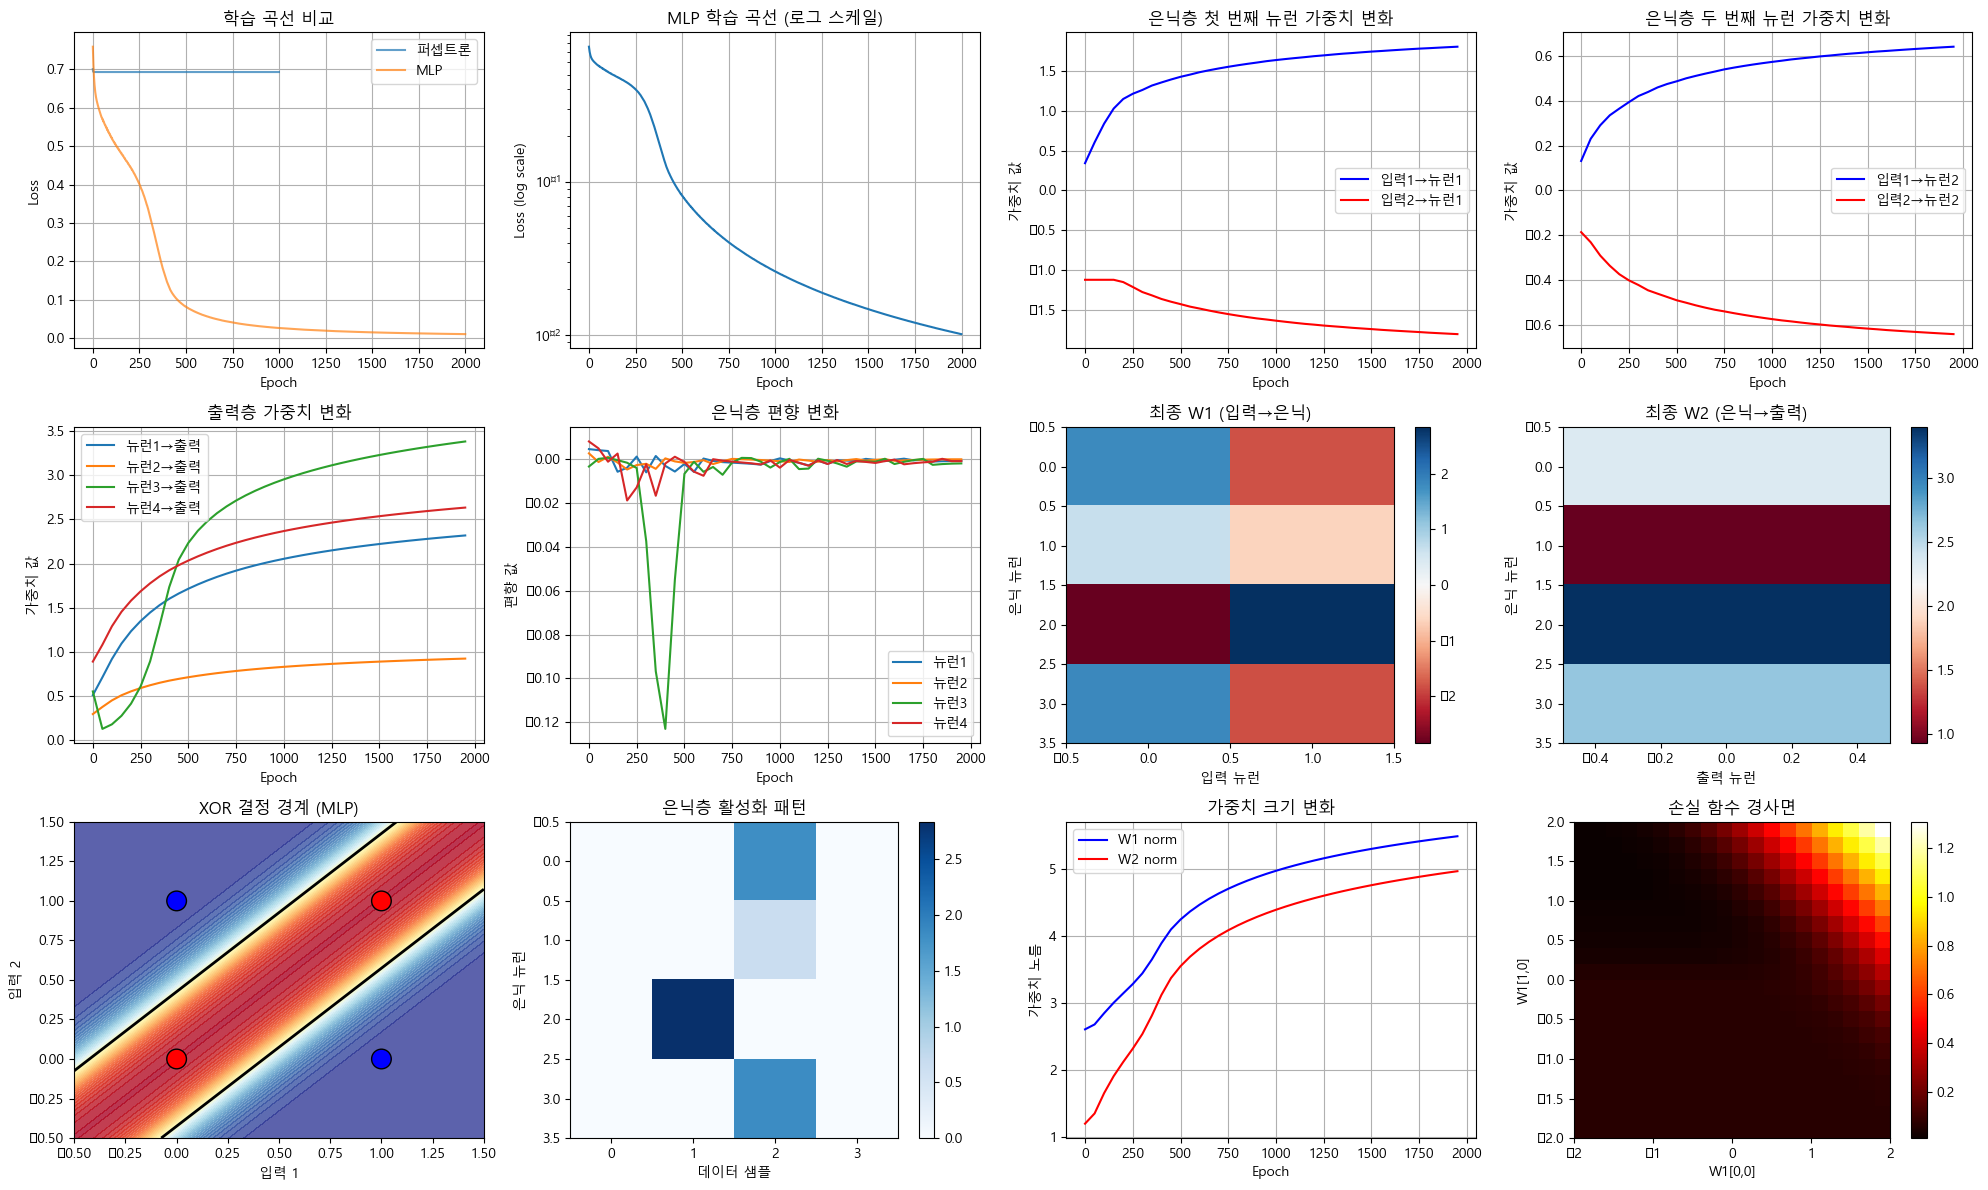


=== 학습된 가중치 분석 ===
최종 W1 (입력 → 은닉층):
tensor([[ 1.8096,  0.6440, -2.8413,  1.8311],
        [-1.8109, -0.6441,  2.8391, -1.8321]])

최종 b1 (은닉층 편향):
tensor([-1.0445e-03, -1.3650e-04, -2.2477e-03, -7.2133e-05])

최종 W2 (은닉층 → 출력):
tensor([[2.3268],
        [0.9259],
        [3.3966],
        [2.6426]])

최종 b2 (출력층 편향):
tensor([-4.0991])

함수 기반 다층 신경망 XOR 학습 완료! ✅

🔍 다층 신경망 역전파 과정 요약:
1. 순전파: 입력 → 은닉층(ReLU) → 출력층(Sigmoid)
2. 손실 계산: BCE 손실 함수
3. 역전파: 출력층부터 거꾸로 기울기 계산
   - 출력층 기울기: dL/dz2 = predicted - actual
   - 은닉층 기울기: dL/dz1 = dL/da1 × ReLU'(z1)
4. 가중치 업데이트: 각 층의 가중치를 기울기 하강법으로 조정
5. 비선형 활성화 함수 덕분에 XOR 같은 복잡한 패턴 학습 가능!


In [10]:
# 함수로 다층 신경망 구현하기
print("=== 함수로 다층 신경망 구현하기 ===")

# 1. XOR 게이트 데이터 준비
X_xor = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_xor = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

print("XOR 게이트 데이터:")
for i in range(len(X_xor)):
    print(f"입력: {X_xor[i].tolist()}, 출력: {y_xor[i].item()}")

# 2. 활성화 함수들 직접 구현
def relu(x):
    """ReLU 함수: max(0, x)"""
    return torch.maximum(x, torch.zeros_like(x))

def relu_derivative(x):
    """ReLU 함수의 미분: x > 0이면 1, 아니면 0"""
    return (x > 0).float()

# 3. 다층 신경망 순전파 함수
def mlp_forward(x, W1, b1, W2, b2):
    """
    다층 신경망 순전파
    x: 입력 (N, 2)
    W1, b1: 은닉층 가중치와 편향 (2, 4), (4,)
    W2, b2: 출력층 가중치와 편향 (4, 1), (1,)
    """
    # 1단계: 입력 → 은닉층
    z1 = torch.mm(x, W1) + b1  # 선형 변환
    a1 = relu(z1)              # ReLU 활성화
    
    # 2단계: 은닉층 → 출력층
    z2 = torch.mm(a1, W2) + b2  # 선형 변환
    a2 = sigmoid(z2)             # Sigmoid 활성화
    
    return a2, z2, a1, z1  # 역전파에 필요한 중간값들 모두 반환

# 4. 먼저 단일 퍼셉트론으로 XOR 시도 (실패 확인)
print(f"\n=== 단일 퍼셉트론으로 XOR 시도 (실패 예상) ===")
torch.manual_seed(42)
weights_single = torch.randn(2, 1, requires_grad=False) * 0.5
bias_single = torch.randn(1, requires_grad=False) * 0.5

# 단일 퍼셉트론으로 XOR 학습 시도
learning_rate = 1.0
perceptron_losses = []

for epoch in range(1000):
    outputs, _ = perceptron_forward(X_xor, weights_single, bias_single)
    
    # 손실 계산
    epsilon = 1e-15
    outputs_clipped = torch.clamp(outputs, epsilon, 1-epsilon)
    loss = -torch.mean(y_xor * torch.log(outputs_clipped) + 
                      (1 - y_xor) * torch.log(1 - outputs_clipped))
    perceptron_losses.append(loss.item())
    
    # 역전파
    dL_dz = outputs - y_xor
    dL_dw = torch.mm(X_xor.t(), dL_dz) / len(X_xor)
    dL_db = torch.mean(dL_dz, dim=0)
    
    weights_single = weights_single - learning_rate * dL_dw
    bias_single = bias_single - learning_rate * dL_db

print("퍼셉트론 XOR 학습 후 예측:")
with torch.no_grad():
    pred_perceptron, _ = perceptron_forward(X_xor, weights_single, bias_single)
    for i in range(len(X_xor)):
        predicted = 1 if pred_perceptron[i].item() > 0.5 else 0
        actual = int(y_xor[i].item())
        correct = "✅" if predicted == actual else "❌"
        print(f"입력: {X_xor[i].tolist()}, 예측: {pred_perceptron[i].item():.3f} → {predicted}, 실제: {actual} {correct}")

# 5. 다층 신경망으로 XOR 학습
print(f"\n=== 다층 신경망으로 XOR 학습 ===")

# 가중치 초기화 (Xavier 초기화 사용)
torch.manual_seed(42)
input_size, hidden_size, output_size = 2, 4, 1

# Xavier 초기화: sqrt(6 / (fan_in + fan_out))
W1 = torch.randn(input_size, hidden_size) * torch.sqrt(torch.tensor(6.0 / (input_size + hidden_size)))
b1 = torch.zeros(hidden_size)
W2 = torch.randn(hidden_size, output_size) * torch.sqrt(torch.tensor(6.0 / (hidden_size + output_size)))
b2 = torch.zeros(output_size)

print(f"초기 가중치 형태:")
print(f"W1 (입력→은닉): {W1.shape}")
print(f"b1 (은닉층 편향): {b1.shape}")
print(f"W2 (은닉→출력): {W2.shape}")
print(f"b2 (출력층 편향): {b2.shape}")

# 가중치 변화 추적용
W1_history, b1_history = [], []
W2_history, b2_history = [], []

# 학습 설정
learning_rate = 0.1
epochs = 2000
mlp_losses = []

print(f"\n학습 시작...")
for epoch in range(epochs):
    # 순전파
    a2, z2, a1, z1 = mlp_forward(X_xor, W1, b1, W2, b2)
    
    # 손실 계산 (Binary Cross Entropy)
    epsilon = 1e-15
    a2_clipped = torch.clamp(a2, epsilon, 1-epsilon)
    loss = -torch.mean(y_xor * torch.log(a2_clipped) + 
                      (1 - y_xor) * torch.log(1 - a2_clipped))
    mlp_losses.append(loss.item())
    
    # 역전파 (연쇄 법칙 적용)
    # 출력층 기울기
    dL_dz2 = a2 - y_xor  # (4, 1)
    dL_dW2 = torch.mm(a1.t(), dL_dz2) / len(X_xor)  # (4, 1)
    dL_db2 = torch.mean(dL_dz2, dim=0)  # (1,)
    
    # 은닉층 기울기 (연쇄 법칙)
    dL_da1 = torch.mm(dL_dz2, W2.t())  # (4, 4)
    dL_dz1 = dL_da1 * relu_derivative(z1)  # (4, 4)
    dL_dW1 = torch.mm(X_xor.t(), dL_dz1) / len(X_xor)  # (2, 4)
    dL_db1 = torch.mean(dL_dz1, dim=0)  # (4,)
    
    # 가중치 업데이트
    W2 = W2 - learning_rate * dL_dW2
    b2 = b2 - learning_rate * dL_db2
    W1 = W1 - learning_rate * dL_dW1
    b1 = b1 - learning_rate * dL_db1
    
    # 가중치 변화 기록 (매 50 에포크마다)
    if epoch % 50 == 0:
        W1_history.append(W1.clone())
        b1_history.append(b1.clone())
        W2_history.append(W2.clone())
        b2_history.append(b2.clone())
    
    # 진행 상황 출력
    if (epoch + 1) % 400 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# 6. MLP 학습 결과 확인
print(f"\nMLP XOR 학습 후 예측:")
with torch.no_grad():
    pred_mlp, _, _, _ = mlp_forward(X_xor, W1, b1, W2, b2)
    for i in range(len(X_xor)):
        predicted = 1 if pred_mlp[i].item() > 0.5 else 0
        actual = int(y_xor[i].item())
        correct = "✅" if predicted == actual else "❌"
        print(f"입력: {X_xor[i].tolist()}, 예측: {pred_mlp[i].item():.3f} → {predicted}, 실제: {actual} {correct}")

# 7. 가중치 변화 과정과 학습 결과 시각화
plt.figure(figsize=(20, 12))

# 7-1. 학습 곡선 비교
plt.subplot(3, 4, 1)
plt.plot(perceptron_losses, label='퍼셉트론', alpha=0.7)
plt.plot(mlp_losses, label='MLP', alpha=0.7)
plt.title('학습 곡선 비교')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 7-2. MLP 학습 곡선 (로그 스케일)
plt.subplot(3, 4, 2)
plt.semilogy(mlp_losses)
plt.title('MLP 학습 곡선 (로그 스케일)')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.grid(True)

# 7-3. 은닉층 첫 번째 뉴런 가중치 변화
plt.subplot(3, 4, 3)
epochs_recorded = list(range(0, len(W1_history)*50, 50))
w1_neuron1 = [w[:, 0] for w in W1_history]  # 첫 번째 뉴런
w1_neuron1_input1 = [w[0].item() for w in w1_neuron1]  # 첫 번째 입력 가중치
w1_neuron1_input2 = [w[1].item() for w in w1_neuron1]  # 두 번째 입력 가중치
plt.plot(epochs_recorded, w1_neuron1_input1, 'b-', label='입력1→뉴런1')
plt.plot(epochs_recorded, w1_neuron1_input2, 'r-', label='입력2→뉴런1')
plt.title('은닉층 첫 번째 뉴런 가중치 변화')
plt.xlabel('Epoch')
plt.ylabel('가중치 값')
plt.legend()
plt.grid(True)

# 7-4. 은닉층 두 번째 뉴런 가중치 변화
plt.subplot(3, 4, 4)
w1_neuron2 = [w[:, 1] for w in W1_history]  # 두 번째 뉴런
w1_neuron2_input1 = [w[0].item() for w in w1_neuron2]
w1_neuron2_input2 = [w[1].item() for w in w1_neuron2]
plt.plot(epochs_recorded, w1_neuron2_input1, 'b-', label='입력1→뉴런2')
plt.plot(epochs_recorded, w1_neuron2_input2, 'r-', label='입력2→뉴런2')
plt.title('은닉층 두 번째 뉴런 가중치 변화')
plt.xlabel('Epoch')
plt.ylabel('가중치 값')
plt.legend()
plt.grid(True)

# 7-5. 출력층 가중치 변화
plt.subplot(3, 4, 5)
w2_changes = [w.flatten() for w in W2_history]  # (4,1) → (4,)
for i in range(4):
    neuron_weights = [w[i].item() for w in w2_changes]
    plt.plot(epochs_recorded, neuron_weights, label=f'뉴런{i+1}→출력')
plt.title('출력층 가중치 변화')
plt.xlabel('Epoch')
plt.ylabel('가중치 값')
plt.legend()
plt.grid(True)

# 7-6. 은닉층 편향 변화
plt.subplot(3, 4, 6)
for i in range(4):
    bias_changes = [b[i].item() for b in b1_history]
    plt.plot(epochs_recorded, bias_changes, label=f'뉴런{i+1}')
plt.title('은닉층 편향 변화')
plt.xlabel('Epoch')
plt.ylabel('편향 값')
plt.legend()
plt.grid(True)

# 7-7. 최종 가중치 히트맵 (입력층→은닉층)
plt.subplot(3, 4, 7)
im1 = plt.imshow(W1.t().detach().numpy(), cmap='RdBu', aspect='auto')
plt.title('최종 W1 (입력→은닉)')
plt.xlabel('입력 뉴런')
plt.ylabel('은닉 뉴런')
plt.colorbar(im1)

# 7-8. 최종 가중치 히트맵 (은닉층→출력층)
plt.subplot(3, 4, 8)
im2 = plt.imshow(W2.detach().numpy(), cmap='RdBu', aspect='auto')
plt.title('최종 W2 (은닉→출력)')
plt.xlabel('출력 뉴런')
plt.ylabel('은닉 뉴런')
plt.colorbar(im2)

# 7-9. XOR 결정 경계 시각화
plt.subplot(3, 4, 9)
# 격자 생성
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100), 
                        torch.linspace(y_min, y_max, 100))
grid_points = torch.stack([xx.flatten(), yy.flatten()], dim=1)

# MLP로 예측
with torch.no_grad():
    grid_pred, _, _, _ = mlp_forward(grid_points, W1, b1, W2, b2)
    grid_pred = grid_pred.reshape(100, 100)

# 등고선 그리기
plt.contourf(xx, yy, grid_pred, levels=50, alpha=0.8, cmap='RdYlBu')
plt.contour(xx, yy, grid_pred, levels=[0.5], colors='black', linewidths=2)

# 데이터 포인트
colors = ['red' if y == 0 else 'blue' for y in y_xor.flatten()]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=200, edgecolors='black')
plt.title('XOR 결정 경계 (MLP)')
plt.xlabel('입력 1')
plt.ylabel('입력 2')

# 7-10. 은닉층 활성화 시각화
plt.subplot(3, 4, 10)
with torch.no_grad():
    _, _, hidden_activation, _ = mlp_forward(X_xor, W1, b1, W2, b2)
    plt.imshow(hidden_activation.t(), cmap='Blues', aspect='auto')
    plt.title('은닉층 활성화 패턴')
    plt.xlabel('데이터 샘플')
    plt.ylabel('은닉 뉴런')
    plt.colorbar()

# 7-11. 가중치 크기 변화
plt.subplot(3, 4, 11)
w1_norms = [torch.norm(w).item() for w in W1_history]
w2_norms = [torch.norm(w).item() for w in W2_history]
plt.plot(epochs_recorded, w1_norms, 'b-', label='W1 norm')
plt.plot(epochs_recorded, w2_norms, 'r-', label='W2 norm')
plt.title('가중치 크기 변화')
plt.xlabel('Epoch')
plt.ylabel('가중치 노름')
plt.legend()
plt.grid(True)

# 7-12. 손실 함수 경사면 (2D 시각화)
plt.subplot(3, 4, 12)
loss_surface = []
w_range = torch.linspace(-2, 2, 20)
for w1_val in w_range:
    loss_row = []
    for w2_val in w_range:
        # 간단한 2D 손실 계산 (첫 번째 가중치 2개만 변경)
        W1_temp = W1.clone()
        W1_temp[0, 0] = w1_val
        W1_temp[1, 0] = w2_val
        pred, _, _, _ = mlp_forward(X_xor, W1_temp, b1, W2, b2)
        epsilon = 1e-15
        pred_clipped = torch.clamp(pred, epsilon, 1-epsilon)
        loss = -torch.mean(y_xor * torch.log(pred_clipped) + 
                          (1 - y_xor) * torch.log(1 - pred_clipped))
        loss_row.append(loss.item())
    loss_surface.append(loss_row)

plt.imshow(loss_surface, extent=[-2, 2, -2, 2], origin='lower', cmap='hot')
plt.title('손실 함수 경사면')
plt.xlabel('W1[0,0]')
plt.ylabel('W1[1,0]')
plt.colorbar()

plt.tight_layout()
plt.show()

# 8. 학습된 가중치 분석
print(f"\n=== 학습된 가중치 분석 ===")
print(f"최종 W1 (입력 → 은닉층):")
print(W1)
print(f"\n최종 b1 (은닉층 편향):")
print(b1)
print(f"\n최종 W2 (은닉층 → 출력):")
print(W2)
print(f"\n최종 b2 (출력층 편향):")
print(b2)

print("\n함수 기반 다층 신경망 XOR 학습 완료! ✅")
print("\n🔍 다층 신경망 역전파 과정 요약:")
print("1. 순전파: 입력 → 은닉층(ReLU) → 출력층(Sigmoid)")
print("2. 손실 계산: BCE 손실 함수")
print("3. 역전파: 출력층부터 거꾸로 기울기 계산")
print("   - 출력층 기울기: dL/dz2 = predicted - actual")
print("   - 은닉층 기울기: dL/dz1 = dL/da1 × ReLU'(z1)")
print("4. 가중치 업데이트: 각 층의 가중치를 기울기 하강법으로 조정")
print("5. 비선형 활성화 함수 덕분에 XOR 같은 복잡한 패턴 학습 가능!")


## 4. 활성화 함수와 최적화

### 4.1 다양한 활성화 함수 비교

**🔥 활성화 함수는 신경망의 핵심입니다!**

**왜 활성화 함수가 필요할까요?**
- 선형 변환만으로는 복잡한 패턴 학습 불가능
- 비선형성을 도입하여 표현력 증대
- 각 함수마다 고유한 특성과 용도

**📊 주요 활성화 함수들:**

| 함수 | 수식 | 범위 | 장점 | 단점 | 주 사용처 |
|------|------|------|------|------|-----------|
| **Sigmoid** | σ(x) = 1/(1+e⁻ˣ) | (0, 1) | 부드러운 곡선, 확률 해석 | 기울기 소실, 출력 편향 | 이진 분류 출력층 |
| **Tanh** | tanh(x) | (-1, 1) | 0 중심, 시그모이드보다 나음 | 기울기 소실 | 은닉층 (ReLU 이전) |
| **ReLU** | max(0, x) | [0, ∞) | 계산 빠름, 기울기 소실 완화 | 죽은 뉴런 문제 | 은닉층 (가장 널리 사용) |
| **Leaky ReLU** | max(0.01x, x) | (-∞, ∞) | 죽은 뉴런 문제 해결 | 하이퍼파라미터 조정 | 은닉층 (ReLU 개선) |

### 4.2 최적화 알고리즘 비교

**⚡ 가중치를 어떻게 업데이트할 것인가?**

**📈 주요 최적화 알고리즘:**

| 알고리즘 | 특징 | 장점 | 단점 | 언제 사용? |
|----------|------|------|------|-----------|
| **SGD** | 기본 경사 하강법 | 단순함, 이해하기 쉬움 | 느린 수렴, 지역 최솟값 | 간단한 문제, 학습용 |
| **Momentum** | 관성 추가 | 진동 감소, 빠른 수렴 | 하이퍼파라미터 추가 | 일반적인 문제 |
| **Adam** | 적응적 학습률 | 빠른 수렴, 안정성 | 메모리 사용량 증가 | 대부분의 딥러닝 (기본 선택) |
| **RMSprop** | 학습률 적응 | Adam의 단순 버전 | Adam보다 성능 떨어질 수 있음 | RNN에서 주로 사용 |

### 4.3 하이퍼파라미터 튜닝

**🎛️ 신경망 성능을 좌우하는 핵심 설정들:**

**주요 하이퍼파라미터:**
1. **학습률(Learning Rate)**: 0.001 ~ 0.1
2. **배치 크기(Batch Size)**: 16, 32, 64, 128
3. **에포크 수(Epochs)**: 과적합 방지
4. **은닉층 크기**: 문제 복잡도에 따라
5. **정규화**: 드롭아웃, L1/L2 정규화

**🔍 학습률 선택 가이드:**
- **너무 큰 학습률**: 발산, 불안정한 학습
- **너무 작은 학습률**: 느린 수렴, 지역 최솟값
- **적절한 학습률**: 안정적이고 빠른 수렴

### 4.4 실제 데이터로 신경망 실습

**🎯 목표: 실제 데이터셋으로 분류 문제 해결**

**사용할 데이터:**
- **회귀 문제**: 사인 함수 근사
- **분류 문제**: 동심원 데이터 분류

**학습할 내용:**
1. 데이터 전처리 및 시각화
2. 적절한 네트워크 구조 설계
3. 활성화 함수와 최적화 알고리즘 선택
4. 학습 과정 모니터링 및 결과 해석


=== 활성화 함수 비교 실험 ===


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3155103597.py:78: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3155103597.py:78: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3155103597.py:78: UserWarning: Glyph 739 (\N{MODIFIER LETTER SMALL X}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\jungh\Anaconda3\envs\aibasic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jungh\Anaconda3\envs\aibasic\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 739 (\N{MODIFIER LETTER SMALL X}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


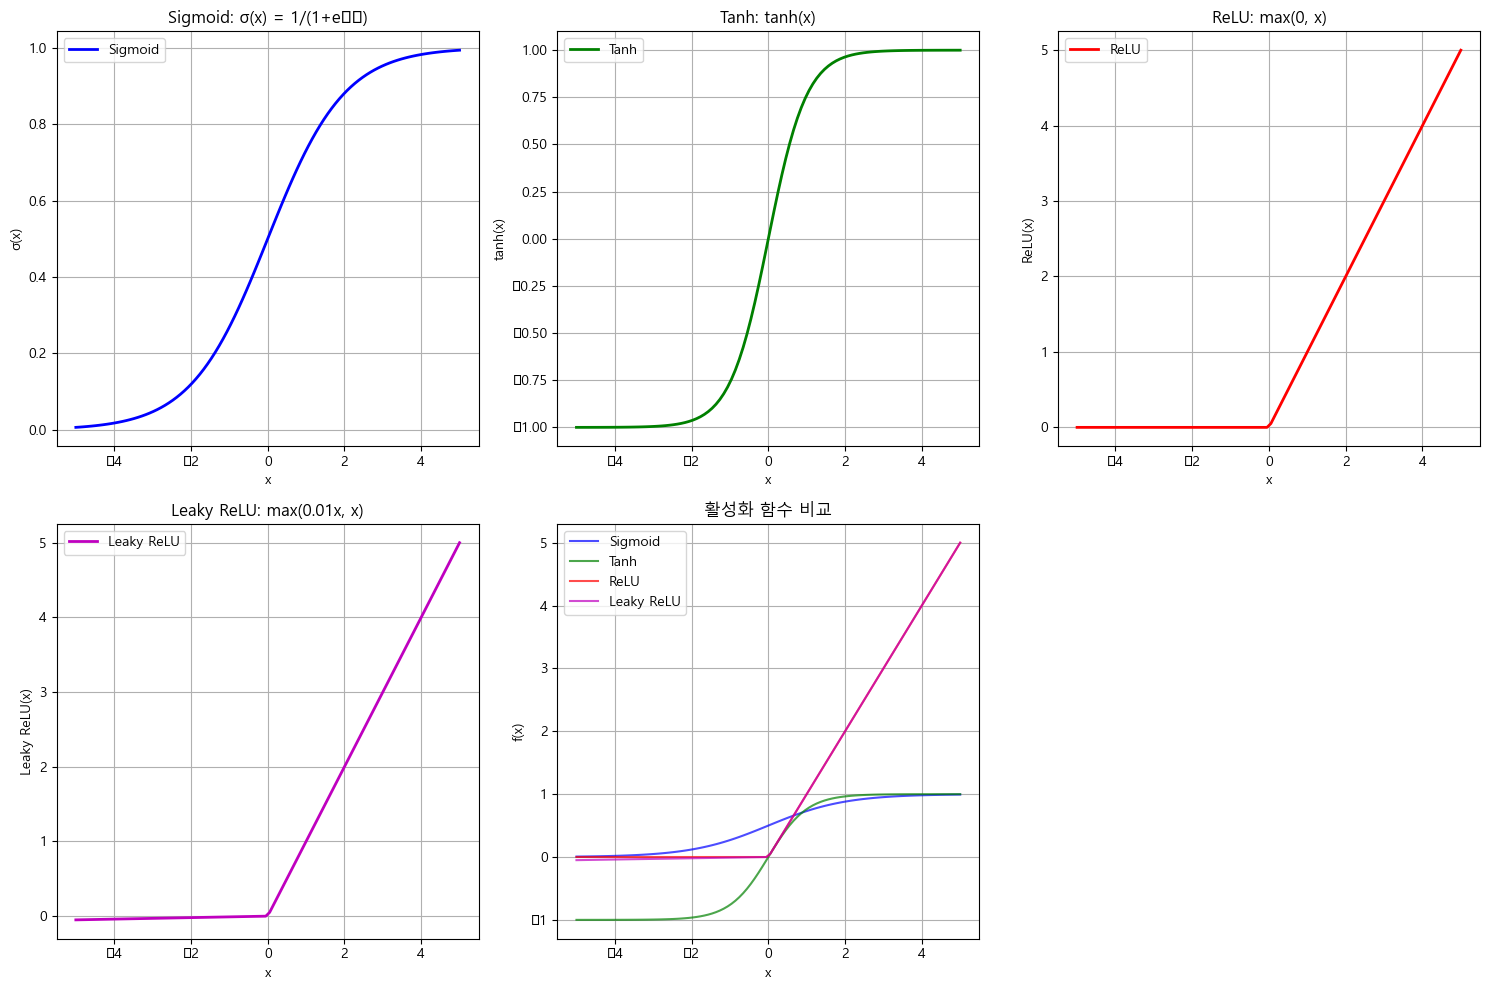


=== XOR 문제에서 활성화 함수 성능 비교 (함수 기반) ===

SIGMOID 활성화 함수로 학습...
  최종 정확도: 75.0%
  최종 손실: 0.6925

TANH 활성화 함수로 학습...
  최종 정확도: 100.0%
  최종 손실: 0.0884

RELU 활성화 함수로 학습...
  최종 정확도: 100.0%
  최종 손실: 0.0307

LEAKY_RELU 활성화 함수로 학습...
  최종 정확도: 100.0%
  최종 손실: 0.0311


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\3155103597.py:336: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


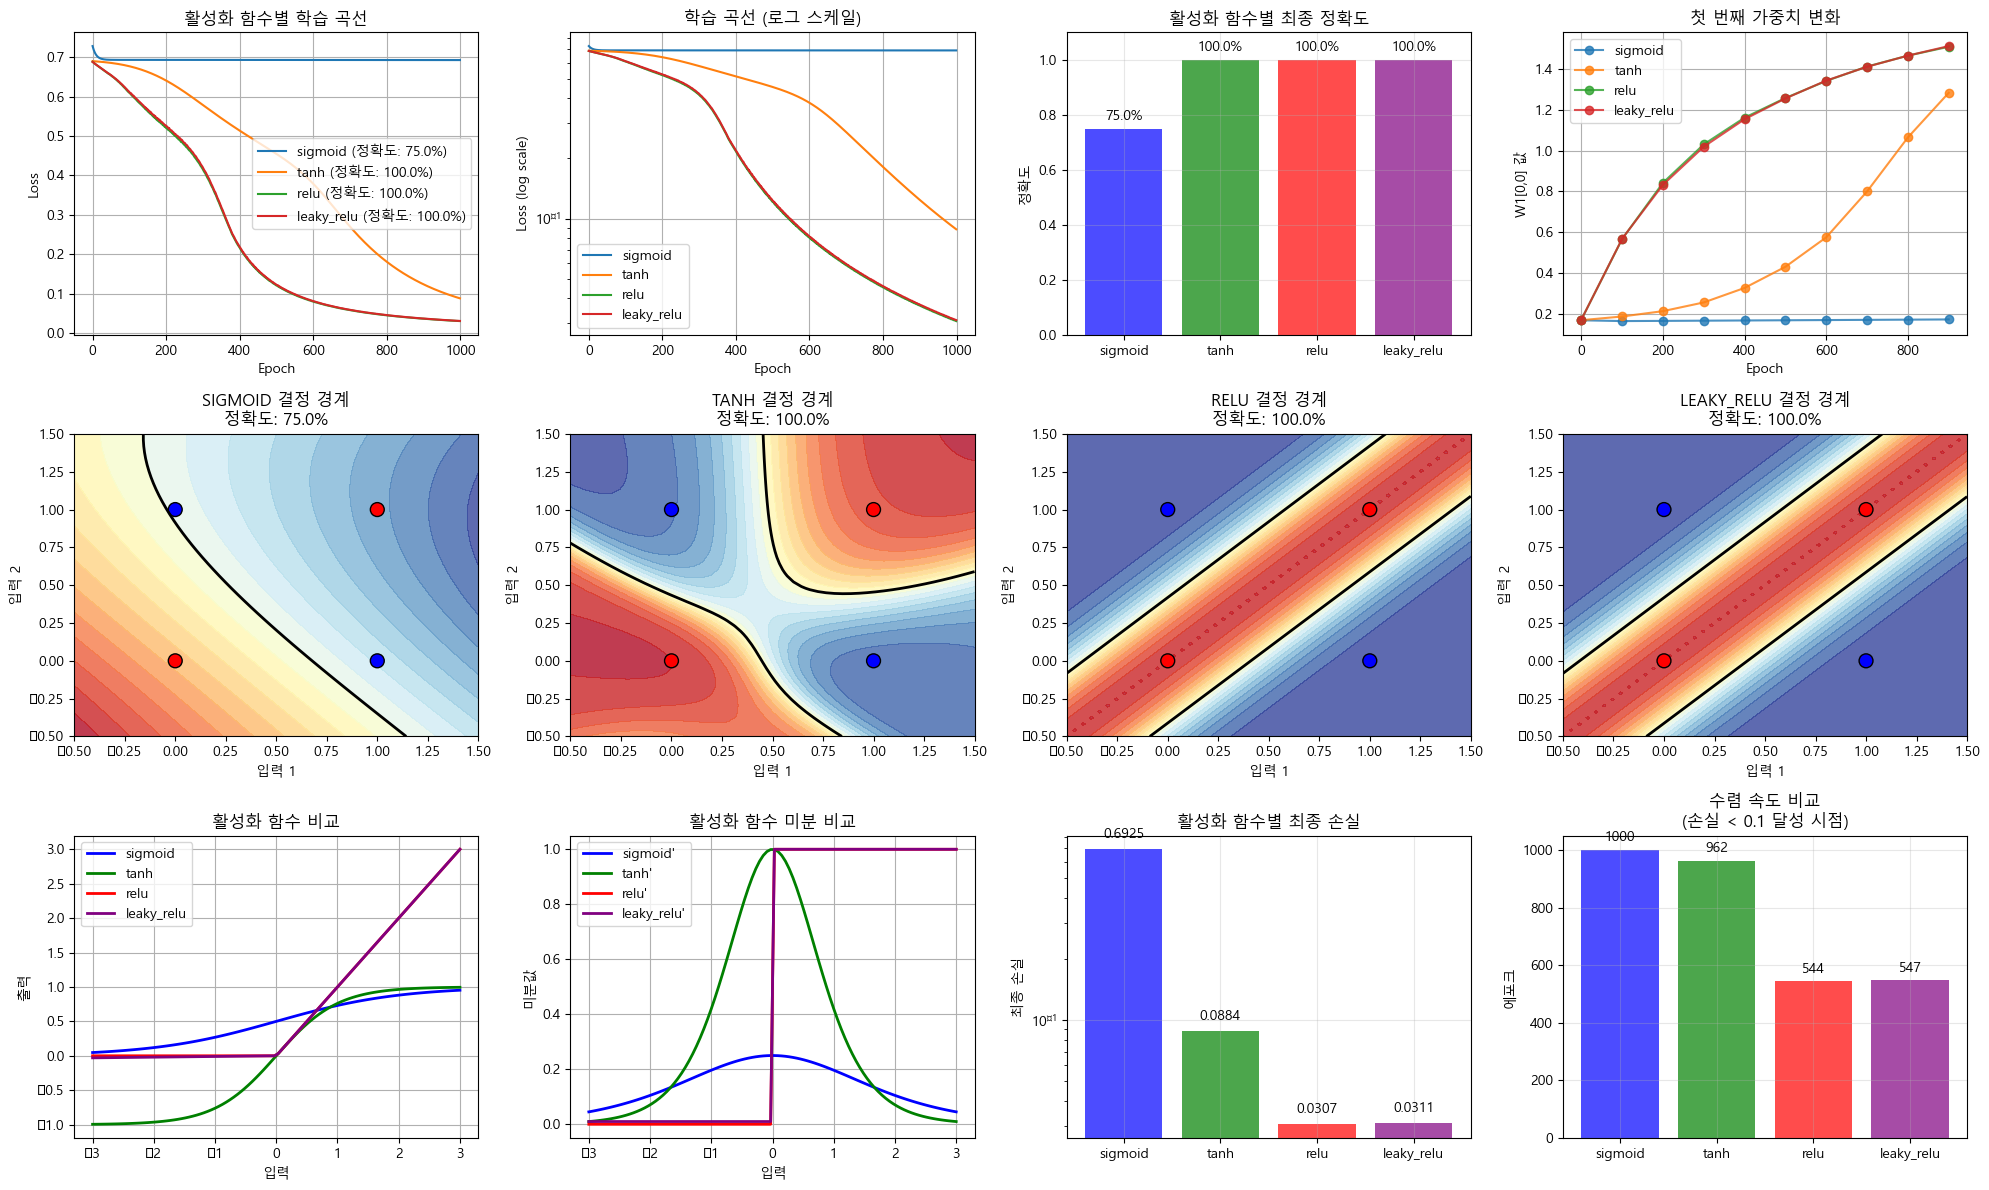


활성화 함수 비교 실험 완료! ✅

🔍 활성화 함수별 특성 요약:
• SIGMOID: 정확도 75.0%, 최종 손실 0.6925
• TANH: 정확도 100.0%, 최종 손실 0.0884
• RELU: 정확도 100.0%, 최종 손실 0.0307
• LEAKY_RELU: 정확도 100.0%, 최종 손실 0.0311

💡 활성화 함수 선택 가이드:
• Sigmoid: 이진 분류 출력층에 주로 사용, 기울기 소실 문제
• Tanh: Sigmoid보다 나음, 여전히 기울기 소실 문제
• ReLU: 가장 널리 사용, 계산 빠름, 죽은 뉴런 문제 가능
• Leaky ReLU: ReLU 개선 버전, 죽은 뉴런 문제 해결


In [11]:
# 활성화 함수 비교 실험 (함수 기반)
print("=== 활성화 함수 비교 실험 ===")

# 다양한 활성화 함수들을 직접 구현
def tanh_func(x):
    """하이퍼볼릭 탄젠트 함수"""
    return torch.tanh(x)

def tanh_derivative(x):
    """Tanh 함수의 미분"""
    t = tanh_func(x)
    return 1 - t**2

def leaky_relu_func(x, alpha=0.01):
    """Leaky ReLU 함수"""
    return torch.where(x > 0, x, alpha * x)

def leaky_relu_derivative(x, alpha=0.01):
    """Leaky ReLU 함수의 미분"""
    return torch.where(x > 0, torch.ones_like(x), torch.full_like(x, alpha))

# 활성화 함수들을 시각화
x = torch.linspace(-5, 5, 100)

# 각 함수 계산
sigmoid_vals = sigmoid(x)
tanh_vals = tanh_func(x)
relu_vals = relu(x)
leaky_relu_vals = leaky_relu_func(x)

# 시각화
plt.figure(figsize=(15, 10))

# 활성화 함수들 그래프
plt.subplot(2, 3, 1)
plt.plot(x.numpy(), sigmoid_vals.numpy(), 'b-', linewidth=2, label='Sigmoid')
plt.title('Sigmoid: σ(x) = 1/(1+e⁻ˣ)')
plt.xlabel('x')
plt.ylabel('σ(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(x.numpy(), tanh_vals.numpy(), 'g-', linewidth=2, label='Tanh')
plt.title('Tanh: tanh(x)')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(x.numpy(), relu_vals.numpy(), 'r-', linewidth=2, label='ReLU')
plt.title('ReLU: max(0, x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(x.numpy(), leaky_relu_vals.numpy(), 'm-', linewidth=2, label='Leaky ReLU')
plt.title('Leaky ReLU: max(0.01x, x)')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(x.numpy(), sigmoid_vals.numpy(), 'b-', label='Sigmoid', alpha=0.7)
plt.plot(x.numpy(), tanh_vals.numpy(), 'g-', label='Tanh', alpha=0.7)
plt.plot(x.numpy(), relu_vals.numpy(), 'r-', label='ReLU', alpha=0.7)
plt.plot(x.numpy(), leaky_relu_vals.numpy(), 'm-', label='Leaky ReLU', alpha=0.7)
plt.title('활성화 함수 비교')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# XOR 문제에서 다양한 활성화 함수 성능 비교 (함수 기반)
print(f"\n=== XOR 문제에서 활성화 함수 성능 비교 (함수 기반) ===")

def mlp_forward_with_activation(x, W1, b1, W2, b2, activation='relu'):
    """다양한 활성화 함수를 사용하는 MLP 순전파"""
    # 1단계: 입력 → 은닉층
    z1 = torch.mm(x, W1) + b1
    
    # 활성화 함수 적용
    if activation == 'sigmoid':
        a1 = sigmoid(z1)
    elif activation == 'tanh':
        a1 = tanh_func(z1)
    elif activation == 'relu':
        a1 = relu(z1)
    elif activation == 'leaky_relu':
        a1 = leaky_relu_func(z1)
    
    # 2단계: 은닉층 → 출력층 (항상 시그모이드)
    z2 = torch.mm(a1, W2) + b2
    a2 = sigmoid(z2)
    
    return a2, z2, a1, z1

def get_activation_derivative(z, activation='relu'):
    """활성화 함수의 미분 반환"""
    if activation == 'sigmoid':
        return sigmoid_derivative(z)
    elif activation == 'tanh':
        return tanh_derivative(z)
    elif activation == 'relu':
        return relu_derivative(z)
    elif activation == 'leaky_relu':
        return leaky_relu_derivative(z)

# 각 활성화 함수로 XOR 학습
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

for act_name in activations:
    print(f"\n{act_name.upper()} 활성화 함수로 학습...")
    
    # 동일한 초기 가중치로 시작 (공정한 비교를 위해)
    torch.manual_seed(42)
    W1 = torch.randn(2, 4) * 0.5
    b1 = torch.zeros(4)
    W2 = torch.randn(4, 1) * 0.5
    b2 = torch.zeros(1)
    
    losses = []
    learning_rate = 0.1
    epochs = 1000
    
    # 가중치 변화 추적 (첫 번째 가중치만)
    weight_changes = []
    
    for epoch in range(epochs):
        # 순전파
        a2, z2, a1, z1 = mlp_forward_with_activation(X_xor, W1, b1, W2, b2, act_name)
        
        # 손실 계산
        epsilon = 1e-15
        a2_clipped = torch.clamp(a2, epsilon, 1-epsilon)
        loss = -torch.mean(y_xor * torch.log(a2_clipped) + 
                          (1 - y_xor) * torch.log(1 - a2_clipped))
        losses.append(loss.item())
        
        # 역전파
        dL_dz2 = a2 - y_xor
        dL_dW2 = torch.mm(a1.t(), dL_dz2) / len(X_xor)
        dL_db2 = torch.mean(dL_dz2, dim=0)
        
        # 은닉층 기울기 (활성화 함수별 미분 적용)
        dL_da1 = torch.mm(dL_dz2, W2.t())
        dL_dz1 = dL_da1 * get_activation_derivative(z1, act_name)
        dL_dW1 = torch.mm(X_xor.t(), dL_dz1) / len(X_xor)
        dL_db1 = torch.mean(dL_dz1, dim=0)
        
        # 가중치 업데이트
        W2 = W2 - learning_rate * dL_dW2
        b2 = b2 - learning_rate * dL_db2
        W1 = W1 - learning_rate * dL_dW1
        b1 = b1 - learning_rate * dL_db1
        
        # 가중치 변화 기록 (매 100 에포크마다)
        if epoch % 100 == 0:
            weight_changes.append(W1[0, 0].item())  # 첫 번째 가중치 추적
    
    # 최종 예측 정확도 계산
    with torch.no_grad():
        pred, _, _, _ = mlp_forward_with_activation(X_xor, W1, b1, W2, b2, act_name)
        predictions = (pred > 0.5).float()
        accuracy = (predictions == y_xor).float().mean().item()
    
    results[act_name] = {
        'losses': losses,
        'accuracy': accuracy,
        'final_loss': losses[-1],
        'weight_changes': weight_changes,
        'final_weights': {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    }
    
    print(f"  최종 정확도: {accuracy:.1%}")
    print(f"  최종 손실: {losses[-1]:.4f}")

# 결과 시각화 (더 자세한 분석)
plt.figure(figsize=(20, 12))

# 1. 학습 곡선 비교
plt.subplot(3, 4, 1)
for act_name in activations:
    plt.plot(results[act_name]['losses'], 
             label=f"{act_name} (정확도: {results[act_name]['accuracy']:.1%})")
plt.title('활성화 함수별 학습 곡선')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 2. 로그 스케일 학습 곡선
plt.subplot(3, 4, 2)
for act_name in activations:
    plt.semilogy(results[act_name]['losses'], label=act_name)
plt.title('학습 곡선 (로그 스케일)')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.grid(True)

# 3. 정확도 막대 그래프
plt.subplot(3, 4, 3)
accuracies = [results[act]['accuracy'] for act in activations]
colors = ['blue', 'green', 'red', 'purple']
bars = plt.bar(activations, accuracies, color=colors, alpha=0.7)
plt.title('활성화 함수별 최종 정확도')
plt.ylabel('정확도')
plt.ylim(0, 1.1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{acc:.1%}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# 4. 가중치 변화 추적
plt.subplot(3, 4, 4)
epochs_weight = list(range(0, 1000, 100))
for act_name in activations:
    plt.plot(epochs_weight, results[act_name]['weight_changes'], 
             'o-', label=act_name, alpha=0.8)
plt.title('첫 번째 가중치 변화')
plt.xlabel('Epoch')
plt.ylabel('W1[0,0] 값')
plt.legend()
plt.grid(True)

# 5-8. 각 활성화 함수별 결정 경계
for i, act_name in enumerate(activations):
    plt.subplot(3, 4, 5 + i)
    
    # 격자 생성
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 50), 
                            torch.linspace(y_min, y_max, 50))
    grid_points = torch.stack([xx.flatten(), yy.flatten()], dim=1)
    
    # 해당 활성화 함수로 예측
    weights = results[act_name]['final_weights']
    with torch.no_grad():
        grid_pred, _, _, _ = mlp_forward_with_activation(
            grid_points, weights['W1'], weights['b1'], 
            weights['W2'], weights['b2'], act_name)
        grid_pred = grid_pred.reshape(50, 50)
    
    # 등고선 그리기
    plt.contourf(xx, yy, grid_pred, levels=20, alpha=0.8, cmap='RdYlBu')
    plt.contour(xx, yy, grid_pred, levels=[0.5], colors='black', linewidths=2)
    
    # 데이터 포인트
    colors_data = ['red' if y == 0 else 'blue' for y in y_xor.flatten()]
    plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors_data, s=100, edgecolors='black')
    plt.title(f'{act_name.upper()} 결정 경계\n정확도: {results[act_name]["accuracy"]:.1%}')
    plt.xlabel('입력 1')
    plt.ylabel('입력 2')

# 9-12. 활성화 함수와 그 미분 함수 비교
plt.subplot(3, 4, 9)
x_act = torch.linspace(-3, 3, 100)
for act_name, color in zip(activations, colors):
    if act_name == 'sigmoid':
        y_vals = sigmoid(x_act)
    elif act_name == 'tanh':
        y_vals = tanh_func(x_act)
    elif act_name == 'relu':
        y_vals = relu(x_act)
    elif act_name == 'leaky_relu':
        y_vals = leaky_relu_func(x_act)
    
    plt.plot(x_act, y_vals, color=color, label=act_name, linewidth=2)
plt.title('활성화 함수 비교')
plt.xlabel('입력')
plt.ylabel('출력')
plt.legend()
plt.grid(True)

# 10. 활성화 함수 미분 비교
plt.subplot(3, 4, 10)
for act_name, color in zip(activations, colors):
    if act_name == 'sigmoid':
        y_derivs = sigmoid_derivative(x_act)
    elif act_name == 'tanh':
        y_derivs = tanh_derivative(x_act)
    elif act_name == 'relu':
        y_derivs = relu_derivative(x_act)
    elif act_name == 'leaky_relu':
        y_derivs = leaky_relu_derivative(x_act)
    
    plt.plot(x_act, y_derivs, color=color, label=f"{act_name}'", linewidth=2)
plt.title('활성화 함수 미분 비교')
plt.xlabel('입력')
plt.ylabel('미분값')
plt.legend()
plt.grid(True)

# 11. 최종 손실 비교
plt.subplot(3, 4, 11)
final_losses = [results[act]['final_loss'] for act in activations]
bars = plt.bar(activations, final_losses, color=colors, alpha=0.7)
plt.title('활성화 함수별 최종 손실')
plt.ylabel('최종 손실')
plt.yscale('log')

for bar, loss in zip(bars, final_losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1, 
             f'{loss:.4f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

# 12. 수렴 속도 비교 (95% 정확도 달성 시점)
plt.subplot(3, 4, 12)
convergence_epochs = []
for act_name in activations:
    losses = results[act_name]['losses']
    # 손실이 0.1 이하로 내려간 첫 시점 찾기
    convergence_epoch = next((i for i, loss in enumerate(losses) if loss < 0.1), len(losses))
    convergence_epochs.append(convergence_epoch)

bars = plt.bar(activations, convergence_epochs, color=colors, alpha=0.7)
plt.title('수렴 속도 비교\n(손실 < 0.1 달성 시점)')
plt.ylabel('에포크')

for bar, epoch in zip(bars, convergence_epochs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{epoch}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n활성화 함수 비교 실험 완료! ✅")
print("\n🔍 활성화 함수별 특성 요약:")
for act_name in activations:
    acc = results[act_name]['accuracy']
    loss = results[act_name]['final_loss']
    print(f"• {act_name.upper()}: 정확도 {acc:.1%}, 최종 손실 {loss:.4f}")
    
print("\n💡 활성화 함수 선택 가이드:")
print("• Sigmoid: 이진 분류 출력층에 주로 사용, 기울기 소실 문제")
print("• Tanh: Sigmoid보다 나음, 여전히 기울기 소실 문제")
print("• ReLU: 가장 널리 사용, 계산 빠름, 죽은 뉴런 문제 가능")
print("• Leaky ReLU: ReLU 개선 버전, 죽은 뉴런 문제 해결")


=== 최적화 알고리즘 비교 실험 ===

SGD 최적화 알고리즘으로 학습...
  최종 손실: 0.111184

SGD+Momentum 최적화 알고리즘으로 학습...
  최종 손실: 0.033320

Adam 최적화 알고리즘으로 학습...
  최종 손실: 0.010913

RMSprop 최적화 알고리즘으로 학습...
  최종 손실: 0.040484


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20852\1840989421.py:126: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


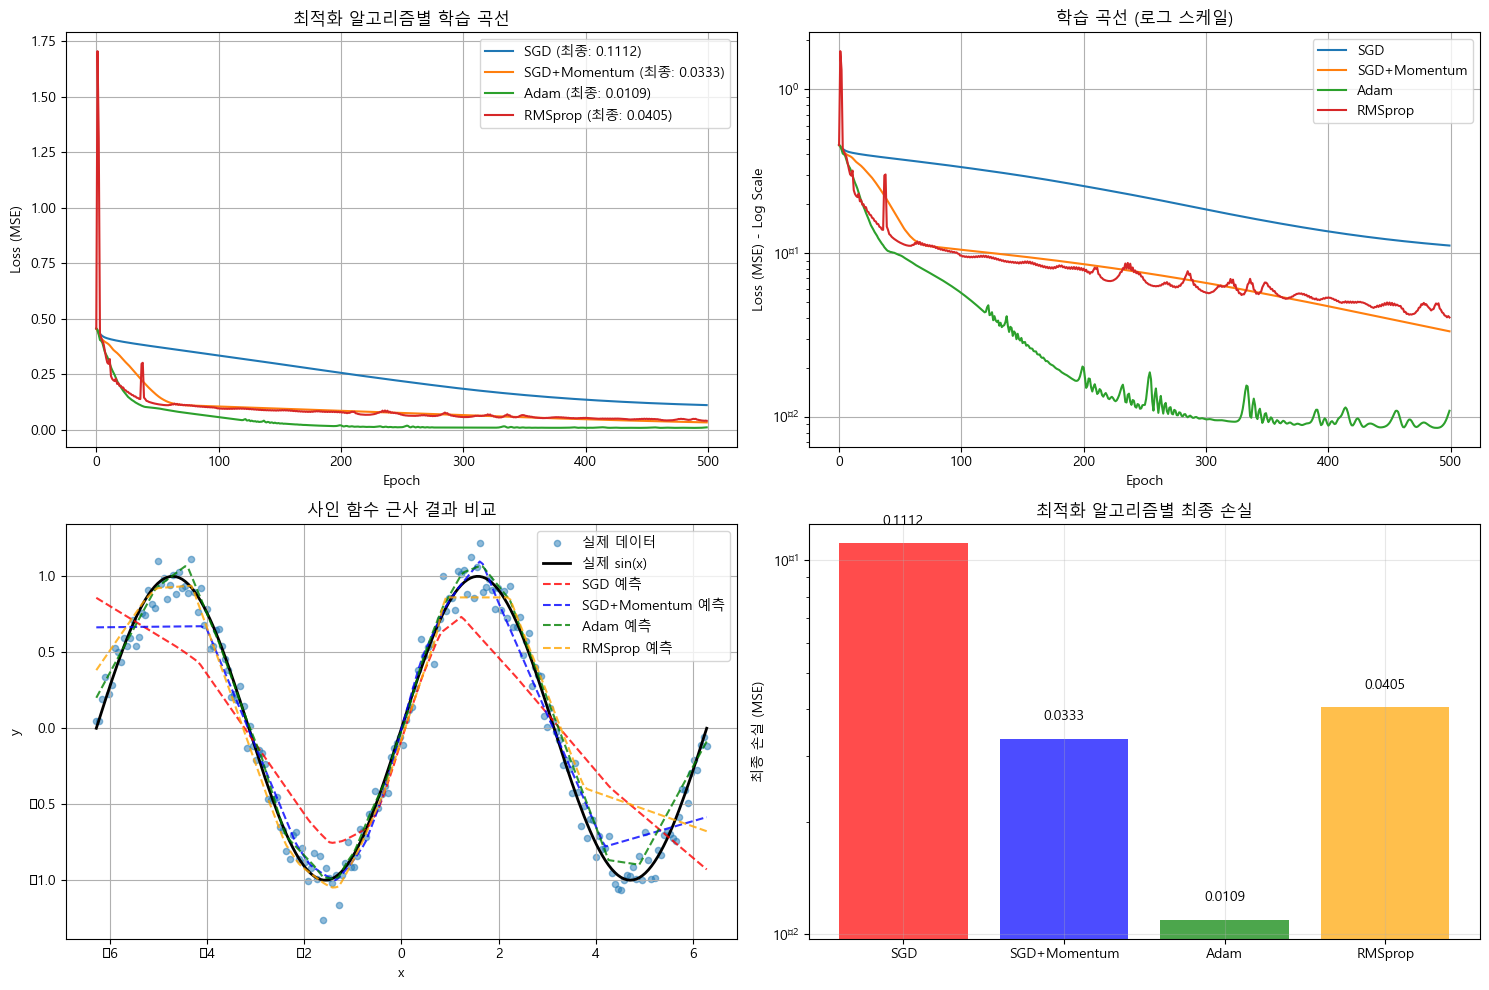


최적화 알고리즘 비교 실험 완료! ✅


In [12]:
# 최적화 알고리즘 비교 실험
print("=== 최적화 알고리즘 비교 실험 ===")

# 사인 함수 데이터 생성 (회귀 문제)
np.random.seed(42)
x_data = np.linspace(-2*np.pi, 2*np.pi, 200)
y_data = np.sin(x_data) + 0.1 * np.random.randn(200)  # 노이즈 추가

X_sin = torch.tensor(x_data.reshape(-1, 1), dtype=torch.float32)
y_sin = torch.tensor(y_data.reshape(-1, 1), dtype=torch.float32)

# 회귀용 신경망 클래스
class RegressionNet(nn.Module):
    def __init__(self):
        super(RegressionNet, self).__init__()
        self.layer1 = nn.Linear(1, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)  # 회귀이므로 활성화 함수 없음
        return x

# 다양한 최적화 알고리즘 비교
optimizers_config = {
    'SGD': {'class': optim.SGD, 'params': {'lr': 0.01}},
    'SGD+Momentum': {'class': optim.SGD, 'params': {'lr': 0.01, 'momentum': 0.9}},
    'Adam': {'class': optim.Adam, 'params': {'lr': 0.01}},
    'RMSprop': {'class': optim.RMSprop, 'params': {'lr': 0.01}}
}

optimizer_results = {}
epochs = 500

for opt_name, opt_config in optimizers_config.items():
    print(f"\n{opt_name} 최적화 알고리즘으로 학습...")
    
    # 모델 초기화 (동일한 초기 가중치를 위해 시드 설정)
    torch.manual_seed(42)
    model = RegressionNet()
    criterion = nn.MSELoss()  # 회귀용 손실 함수
    optimizer = opt_config['class'](model.parameters(), **opt_config['params'])
    
    losses = []
    
    for epoch in range(epochs):
        outputs = model(X_sin)
        loss = criterion(outputs, y_sin)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
    
    optimizer_results[opt_name] = {
        'losses': losses,
        'final_loss': losses[-1],
        'model': model
    }
    
    print(f"  최종 손실: {losses[-1]:.6f}")

# 결과 시각화
plt.figure(figsize=(15, 10))

# 학습 곡선 비교
plt.subplot(2, 2, 1)
for opt_name in optimizers_config.keys():
    plt.plot(optimizer_results[opt_name]['losses'], 
             label=f"{opt_name} (최종: {optimizer_results[opt_name]['final_loss']:.4f})")
plt.title('최적화 알고리즘별 학습 곡선')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

# 로그 스케일로 학습 곡선
plt.subplot(2, 2, 2)
for opt_name in optimizers_config.keys():
    plt.semilogy(optimizer_results[opt_name]['losses'], label=opt_name)
plt.title('학습 곡선 (로그 스케일)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE) - Log Scale')
plt.legend()
plt.grid(True)

# 원본 데이터와 예측 결과 비교
plt.subplot(2, 2, 3)
plt.scatter(x_data, y_data, alpha=0.5, s=20, label='실제 데이터')
plt.plot(x_data, np.sin(x_data), 'k-', label='실제 sin(x)', linewidth=2)

# 각 최적화 알고리즘의 예측 결과
colors = ['red', 'blue', 'green', 'orange']
for i, (opt_name, color) in enumerate(zip(optimizers_config.keys(), colors)):
    model = optimizer_results[opt_name]['model']
    with torch.no_grad():
        pred = model(X_sin)
        plt.plot(x_data, pred.numpy(), '--', color=color, 
                label=f'{opt_name} 예측', alpha=0.8)

plt.title('사인 함수 근사 결과 비교')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# 최종 손실 막대 그래프
plt.subplot(2, 2, 4)
final_losses = [optimizer_results[opt]['final_loss'] for opt in optimizers_config.keys()]
bars = plt.bar(list(optimizers_config.keys()), final_losses, 
               color=colors, alpha=0.7)
plt.title('최적화 알고리즘별 최종 손실')
plt.ylabel('최종 손실 (MSE)')
plt.yscale('log')  # 로그 스케일

# 막대 위에 값 표시
for bar, loss in zip(bars, final_losses):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.1, 
             f'{loss:.4f}', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n최적화 알고리즘 비교 실험 완료! ✅")


## 📚 10강 정리 및 다음 단계

### 🎯 오늘 학습한 핵심 내용

1. **PyTorch 기본 사용법**
   - 텐서 생성과 연산
   - 자동 미분(AutoGrad) 메커니즘
   - GPU vs CPU 연산 비교

2. **퍼셉트론 구현**
   - nn.Module 클래스 상속
   - AND 게이트 학습 과정
   - 학습 루프의 핵심 단계

3. **다층 신경망과 순전파/역전파**
   - XOR 문제로 다층 구조의 필요성 이해
   - 순전파와 역전파 과정 구현
   - 퍼셉트론 vs MLP 성능 비교

4. **활성화 함수와 최적화**
   - 다양한 활성화 함수 특성 비교
   - 최적화 알고리즘 성능 분석
   - 하이퍼파라미터의 중요성

### 🔑 핵심 개념 정리

**📊 신경망 학습의 4단계:**
```
1. 순전파 (Forward): 입력 → 예측
2. 손실 계산 (Loss): 예측 vs 실제
3. 역전파 (Backward): 기울기 계산
4. 가중치 업데이트 (Update): 최적화
```

**⚡ PyTorch 학습 루프 템플릿:**
```python
for epoch in range(epochs):
    # 순전파
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 역전파
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 가중치 업데이트
```

### 🚀 다음 강의 예고: 11강

**주제**: 딥러닝 신경망 (CNN)
- **컨볼루션 신경망 개념**: 이미지 처리의 혁신
- **컨볼루션 레이어 이해**: 필터, 스트라이드, 패딩
- **풀링과 정규화**: 특성 맵 크기 조절
- **CNN 아키텍처**: LeNet, AlexNet, VGG 구조

### 💡 실습 과제

**🏠 필수 과제:**
1. **다른 논리 게이트 구현**: OR, NAND 게이트를 퍼셉트론으로 학습
2. **은닉층 크기 실험**: 2, 8, 16개 뉴런으로 XOR 성능 비교
3. **학습률 실험**: 0.001, 0.01, 0.1, 1.0으로 수렴 속도 비교
4. **배치 크기 실험**: 전체 데이터 vs 미니배치 학습 비교

**🚀 도전 과제:**
1. **3층 이상 신경망**: 더 깊은 네트워크로 복잡한 함수 근사
2. **정규화 기법**: 드롭아웃, 배치 정규화 적용
3. **실제 데이터셋**: Iris, Wine 데이터셋으로 분류 실습
4. **모델 저장/로드**: 학습된 모델 저장하고 불러오기

### 🛠️ 실무 팁

**🔍 디버깅 체크리스트:**
- [ ] 데이터 타입과 shape 확인
- [ ] 학습률이 적절한지 확인 (0.001~0.1)
- [ ] 손실이 감소하는지 모니터링
- [ ] 과적합/언더피팅 여부 판단
- [ ] GPU 메모리 사용량 확인

**📈 성능 향상 팁:**
- **데이터 정규화**: 입력을 0~1 또는 평균 0, 분산 1로 조정
- **적절한 초기화**: Xavier, He 초기화 사용
- **학습률 스케줄링**: 학습 진행에 따라 학습률 감소
- **조기 종료**: 검증 손실이 증가하면 학습 중단

### 🎓 학습 성과 확인

**✅ 이제 여러분은 다음을 할 수 있습니다:**
- PyTorch로 기본적인 신경망 구현
- 퍼셉트론의 한계와 다층 구조의 필요성 이해
- 다양한 활성화 함수와 최적화 알고리즘 활용
- 학습 과정 모니터링 및 결과 해석

**🌟 다음 단계를 위한 준비:**
- 컨볼루션 신경망(CNN) 개념 예습
- 이미지 데이터 처리 방법 학습
- OpenCV, PIL 라이브러리 설치 준비

**🎯 실습 플랫폼:**
- Google Colab (무료 GPU)
- Kaggle Kernels (데이터셋 + GPU)
- Papers with Code (최신 연구 + 코드)

---

**🎉 10강 완주를 축하합니다!** 

이제 여러분은 신경망의 기본 원리를 이해하고 직접 구현할 수 있는 실력을 갖추었습니다. 
다음 강의에서는 더욱 강력한 CNN을 배워 이미지 분류에 도전해보겠습니다! 🚀
